Primeiras linhas do dataset:
         Date         High          Low         Open        Close  \
0  2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1  2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2  2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3  2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4  2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  
0  3.587980e+09  2086.590088  
1  3.884930e+09  2089.139893  
2  2.852940e+09  2088.870117  
3  2.852940e+09  2088.870117  
4  1.466840e+09  2090.110107  

Formato dos conjuntos de dados:
X_train: (1450, 10, 1) y_train: (1450,)
X_test: (355, 10, 1) y_test: (355,)

Resumo do modelo:


C:\Users\Sefaz\Documents\exercicios\data-science\previsao\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0549 - val_loss: 0.0063
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7348e-04 - val_loss: 0.0029
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9259e-04 - val_loss: 0.0029
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1727e-04 - val_loss: 0.0028
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5443e-04 - val_loss: 0.0028
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8586e-04 - val_loss: 0.0028
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0820e-04 - val_loss: 0.0028
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2135e-04 - val_loss: 0.0029
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7650e-04 - val_loss: 0.0028
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8551e-04 - val_loss: 0.0027
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7090e-04 - val_loss: 0.0027
Epoch 12/50
46/46 ━━━━━━━━━━

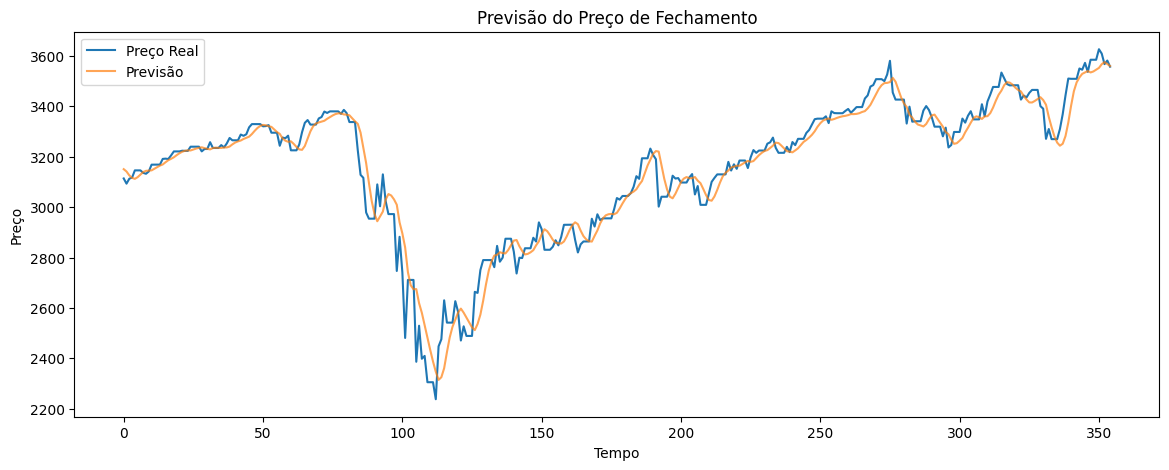

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step

Previsão do próximo valor de fechamento: 3446.49609375


In [6]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Passo 1: Carregar o dataset
data = pd.read_csv('yahoo_stock.csv')

# Verificar as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(data.head())

# Passo 2: Transformar em array 2D 
preco_fechamento = data['Close'].values.reshape(-1, 1)

# Normalizar os valores entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
preco_fechamento_normalizado = scaler.fit_transform(preco_fechamento)


# Passo 3: Criar os conjuntos de treino e teste
train_size = int(len(preco_fechamento_normalizado) * 0.8)
train_data = preco_fechamento_normalizado[:train_size]
test_data = preco_fechamento_normalizado[train_size:]

# Função para criar sequências
def criar_input_LSTM(data, janela_temporal=60):
    X, y = [], []
    for i in range(janela_temporal, len(data)):
        #obter inputs em um período temporal
        X.append(data[i - janela_temporal:i, 0])
        #valores apos input
        y.append(data[i, 0])
        # transformar em array numpy
    return np.array(X), np.array(y)

# Criar sequências para os conjuntos de treino e teste
janela_Temporal = 10
X_train, y_train = criar_input_LSTM(train_data, janela_Temporal)
X_test, y_test = criar_input_LSTM(test_data, janela_Temporal)

# Redimensionar os dados para [amostras, passos de tempo, características]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("\nFormato dos conjuntos de dados:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# Passo 4: Construir o modelo LSTM

#2 LSTM com 50 unidades cada e uma camada densa 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(units=1))
# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nResumo do modelo:")
print(model.summary())


# Passo 5: Treinar o modelo
epochs = 50 #iteracoes
batch_size = 32 #tamanho do lote
historico_modelo = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

# Passo 6: Fazer previsões
predicoes = model.predict(X_test)
predicoes = scaler.inverse_transform(predicoes)

# Reverter escala dos valores reais
precos_reais_target = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular o erro médio absoluto (MAE)
mae = np.mean(np.abs(predicoes - precos_reais_target))
print(f"\nErro Médio Absoluto (MAE): {mae}")

# Passo 7: Visualizar os resultados
plt.figure(figsize=(14, 5))
plt.plot(precos_reais_target, label='Preço Real')
plt.plot(predicoes, label='Previsão', alpha=0.7)
plt.title('Previsão do Preço de Fechamento')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()

# Passo 8: Previsão de valor futuro
last_60_days = preco_fechamento_normalizado[-60:].reshape(1, -1, 1)
valores_futuros = model.predict(last_60_days)
valores_futuros = scaler.inverse_transform(valores_futuros)

print(f"\nPrevisão do próximo valor de fechamento: {valores_futuros[0][0]}")
